In [1]:
import sys
sys.path.append("../python/visual_search/")
from visual_search import VisualSearch
from models import *
import json
from glob import glob
import ipyplot
from matplotlib import pyplot as plt
from tqdm import tqdm

Creating a collection to keep the images 
-------------

In this case we are using MOBILE_NET_V2 as the feature extractor. 

In [2]:
api = VisualSearch(bearer_token="secrettoken", address="http://localhost:8890")
upsert_collection = UpsertCollection(
    config=GenericModelConfig(
        model_architecture=ModelArchitecture.MOBILE_NET_V2
    ), 
    name="images"
)
response = api.upsert_collection(upsert_collection)

Indexing local images
-----------

It is possible to index local images using `ImageBytes` or `ImageSource(url="link_to_image")`

In [3]:
for img_path in tqdm(sorted(glob("../../images/imagenet-sample-images/*.JPEG"))):
    image_id = img_path.split("/")[-1].split(".")[0]
    with open(img_path, "rb") as inp:
        image_bytes = list(inp.read())
    image_source = ImageSource(image_bytes=ImageBytes(image_bytes))
    add_image = AddImage(collection_name="images", id=image_id, source=image_source)
    resp = api.add_image(add_image)

100%|██████████| 1000/1000 [01:39<00:00, 10.05it/s]


Searching for a cat 
-----------


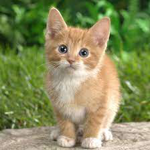


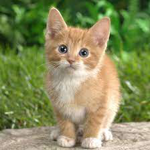

In [7]:
img = plt.imread("../../images/cat.jpeg")
ipyplot.plot_images([img])

In [4]:
with open("../../images/cat.jpeg", "rb") as inp:
    image_bytes = list(inp.read())
image_source = ImageSource(image_bytes=ImageBytes(image_bytes))
search_image = SearchImage(collection_name="images", n_results=8, source=image_source)
%time search_results = json.loads(api.search_image(search_image).content)
search_results

CPU times: user 9.17 ms, sys: 0 ns, total: 9.17 ms
Wall time: 152 ms


{'collection_name': 'images',
 'results': [{'id': '283', 'similarity': 1100469350},
  {'id': '278', 'similarity': 1100724118},
  {'id': '281', 'similarity': 1100757481},
  {'id': '285', 'similarity': 1100871504},
  {'id': '174', 'similarity': 1100907644},
  {'id': '274', 'similarity': 1101160236},
  {'id': '249', 'similarity': 1101246942},
  {'id': '332', 'similarity': 1101420168}]}


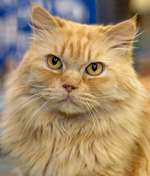
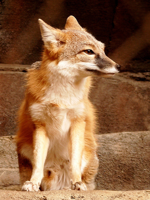
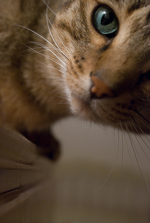
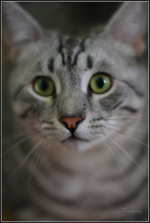
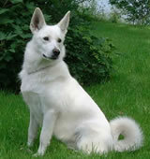
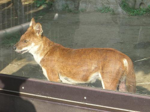
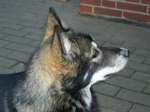
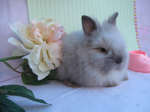


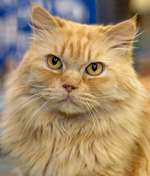
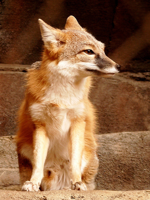
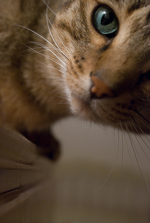
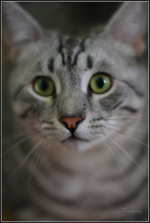
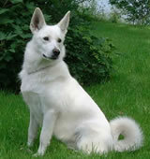
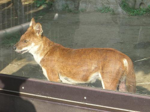
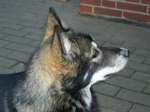
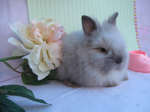

In [6]:
images_paths = []
for result in search_results["results"]:
    fn = "/home/pawel/logicai/visual-search/images/imagenet-sample-images/{}.JPEG".format(result["id"])
    img = plt.imread(fn)
    images_paths.append(img)    
ipyplot.plot_images(images_paths)